# Contenido 
1. [Analisis tecnico](#analisistec)
2. [Grafico de velas](#grafvelas) 
   1. [Explicacion](#expl1)
3. [Backtesting de una estrategia basada en la media móvil simple](#back)
   1. [Introduccion a backtrader](#introtoback)
      1. [Sobre la estrategia utilizada en SMA](#aboutsma)
      2. [Puntos claves de la estrategia ](#keystrategy)
   2. [Definiendo una señal](#signal)
      1. [Grafico y explicacion](#graphid2)
   3. [Definiendo una estrategia](#strategy)|
      1. [Grafico y explicacion](#graphid3)
   4. [Prueba funcion optimizada](#funcoptimin)
   5. [Señales](#signals)
   6. [Estrategias](#strategy)
   7. [Notas generales](#generals)
3. [Bandas de bollinger](#bollinger)



# Analisis tecnico <a name="analisistec"></a>
En resumen, el AT (análisis técnico) es una metodología para determinar (pronosticar) la dirección futura de los precios de los activos e identificar oportunidades de inversión, basándose en el estudio de los datos pasados del mercado, especialmente los propios precios y el volumen negociado.
* Comenzamos introduciendo una forma sencilla de visualizar los precios de las acciones utilizando el gráfico de velas. 
* Mostramos cómo calcular los indicadores seleccionados (con pistas sobre cómo calcular otros utilizando bibliotecas de Python seleccionadas) utilizados para el AT. 

Utilizando bibliotecas de Python establecidas, mostramos lo fácil que es hacer un backtest de las estrategias de trading construidas sobre la base de los indicadores de AT. De este modo, podemos evaluar el rendimiento de estas estrategias en un contexto real (incluso incluyendo las comisiones y demás).


**Se presentan los siguientes temas**
* Creación de un gráfico de velas 
* Backtesting de una estrategia basada en la media móvil simple 
* Cálculo de las Bandas de Bollinger y prueba de una estrategia de compra/venta 
* Cálculo del índice de fuerza relativa y prueba de una estrategia larga/corta 
* Construcción de un tablero interactivo para AT

# Grafico de velas  <a name="grafvelas"></a>
**Creacion de grafico de velas**
Un gráfico de velas es un tipo de gráfico financiero que se utiliza para describir los movimientos de precios de un determinado valor. Una sola vela (que suele corresponder a un día, pero es posible una frecuencia más alta) combina los precios de apertura, alta, baja y cierre (OHLC (Open High Low Close)). 

Los elementos de una vela alcista (cuando el precio de cierre en un periodo de tiempo determinado es superior al precio de apertura) se presentan en la siguiente imagen (para una bajista, deberíamos intercambiar las posiciones de los precios de apertura y cierre):

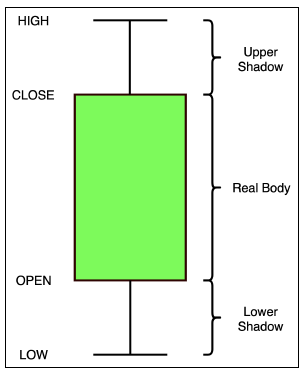


Los gráficos de velas transmiten mucha más información que un simple gráfico de líneas del precio de cierre ajustado. Por eso se utilizan a menudo en las plataformas de negociación reales, y los operadores los utilizan para identificar patrones y tomar decisiones de negociación.

***Tareas a realizar***

Añadir líneas de media móvil (que son uno de los indicadores técnicos más básicos), Añadir gráficos de barras que representan el volumen.

**Preparacion de ambiente y manejor de datos**

Descarga de datos

## Explicación  <a name="expl1"></a>
Creamos un objeto `QuantFig` pasando un DataFrame que contiene los datos de entrada, así como algunos argumentos para el título y la posición de la leyenda. Podríamos haber creado un simple gráfico de velas ejecutando el método `iplot` de `QuantFig` inmediatamente después.

Tambien se añadio dos líneas de media móvil utilizando los métodos `add_sma/add_ema`. 
Decidimos considerar 20 períodos (días, en este caso). 

Por defecto, las medias se calculan utilizando la columna "*close*", sin embargo, podemos cambiar esto proporcionando el argumento de la columna.

**Grafico de media movil**

En el gráfico, podemos ver que la media móvil exponencial (EMA) se adapta a los cambios en los precios mucho más rápido que la SMA. Algunas discontinuidades en el gráfico están causadas por el hecho de que estamos utilizando datos diarios, y no hay datos para los fines de semana/festivos bancarios.

In [1]:
#1 Importando librerias a usar
import pandas as pd 
import yfinance as yf

## -> Descarga de informacion twitter

df_twtr = yf.download('TWTR', 
                       start='2018-01-01', 
                       end='2018-12-31',
                       progress=False,
                       auto_adjust=True)

In [ ]:
# Configuracion de cufflinks para graficos interactivos

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

cf.go_offline()
init_notebook_mode()

In [ ]:
# Grafico twitter

qf = cf.QuantFig(df_twtr, title="Twitter precios de mercado",
                    legend="top", name="TWTR"
)

# Añadiendo volumen y medias moviles
qf.add_volume()
qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=20, color="green")

# Mostrar grafico
qf.iplot()

# Backtesting de una estrategia basada en la media móvil simple <a name="back"></a>


La idea general que subyace en el backtesting es evaluar el rendimiento de una estrategia de negociación -construida a partir de algunas heurísticas o indicadores técnicos- aplicándola a datos históricos.

> Introduccion al framework `backtrader`

## Introduccion a backtrader <a name="introtoback"></a>
* Una gran cantidad de indicadores técnicos disponibles (backtrader también proporciona una envoltura alrededor de la popular biblioteca TA-Lib) y medidas de rendimiento 
* Facilidad para construir y aplicar nuevos indicadores Múltiples fuentes de datos disponibles (incluyendo Yahoo Finance, Quandl)
* La simulación de muchos aspectos de los corredores reales, tales como diferentes tipos de órdenes (market, limit, stop), el deslizamiento (la diferencia entre los precios de ejecución previstos y reales de una orden), la comisión, ir largo / corto.
* Una llamada de una línea para un gráficar, con todos los resultados

*Los ejercicios funcionan con la siguiente versión: 1.9.76.123*
> La versión oficial de backtrader tiene errores, esta versión compite para ser su sucesora pero se encuentra abandonada se instala con el comando : `pip install git+https://github.com/backtrader2/backtrader.git#egg=backtrader`




### Sobre la estrategia utilizada (sma) <a name="aboutsma"></a>
Consideramos una estrategia básica basada en el SMA. Los puntos clave de la estrategia son los siguientes:

**What Is Simple Moving Average (SMA)?**

[Referencia a la definicion](https://www.investopedia.com/terms/s/sma.asp)

* Una media móvil simple (SMA) calcula la media de un rango de precios seleccionado, normalmente precios de cierre, por el número de periodos de ese rango.
* Una media móvil simple es un indicador técnico que puede ayudar a determinar si el precio de un activo continuará o si invertirá una tendencia alcista o bajista.
* Una media móvil simple puede mejorarse como una media móvil exponencial (EMA) que se basa en mayor medida en la acción reciente de los precios.

---
### Puntos claves de la estrategia <a name="keystrategy"></a>

Si una media móvil simple de más corto plazo está por encima de una media de más largo plazo, se espera una tendencia alcista. Por otro lado, si la media a largo plazo está por encima de una media a corto plazo, se espera una tendencia bajista.

* Cuando el precio de cierre sea superior a la SMA de 20 días, compre una acción.
* Cuando el precio de cierre es inferior a la SMA de 20 días y tenemos una acción, la vendemos.
* Sólo podemos tener un máximo de una acción en un momento dado.
* No se permite la venta en corto.


Se puede trabajar con dos enfoques posibles:
* Construir una estrategia de negociación, utilizando una señal (`bt.Signal`)
* Definir una estrategia completa (`bt.Strategy`).

Ambos producen los mismos resultados, sin embargo, es más largo, utilizando `bt.Strategy`, proporciona más registro de lo que realmente está sucediendo en el fondo. 

Esto facilita la depuración y el seguimiento de todas las operaciones (el nivel de detalle incluido en el registro depende de nuestras necesidades).

## Definiendo una señal <a name="signal"></a>
Uso de `backtrader.Signal`


In [ ]:
from datetime import datetime
import backtrader as bt
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode()

# DEFINIENDO UNA CLASE QUE REPRESENTA LA ESTRATEGIA
class SmaSignal(bt.Signal):
    params = (('period', 20), )
    
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)
    

In [ ]:
## Descargando datos de YAHOO FINANCE

data = bt.feeds.YahooFinanceData(dataname='AAPL', 
                                 fromdate=datetime(2018, 1, 1),
                                 todate=datetime(2018, 12, 31))


## Configurando BACKTEST
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)  
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

## EJECUTAR BACKTEST
print(f"Comenzando portafolio con: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Finalizando portafolio con: {cerebro.broker.getvalue():.2f}")





### Grafico y explicacion <a name="graphid2"></a>

El gráfico se divide en tres partes: la evolución del valor de la cartera, el precio del activo (junto con las señales de compra/venta) además de mostrarse el volumen y, por último, el indicador técnico que elijamos, como se muestra en el siguiente gráfico:

In [ ]:
## GRAFICANDO RESULTADOS
cerebro.plot(iplot=True, volume=True)

## Definiendo una estrategia <a name="strategy"></a>
Definicion y uso de: `backtrader.Strategy`

In [ ]:
# CONFIGURACION DE LA SIMULACION.
from datetime import datetime
import backtrader as bt
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode()

In [ ]:
class SmaStrategy(bt.Strategy):
    params = (('ma_period', 20), ) ## Media movil 20 dias
    
    def __init__(self):
        # seguir el precio de cierre de la serie
        self.data_close = self.datas[0].close

        # llevar el control de los pedidos precio de: orden, compra y comisiones
        self.order = None
        self.price = None
        self.comm = None

        # añadir un indicador de media móvil simple
        self.sma = bt.ind.SMA(self.datas[0],
                              period=self.params.ma_period)
        
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
        
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # orden ya presentada/aceptada - no se requiere ninguna acción
            return
        
        # informe de la orden ejecutada
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}')

        # reportar orden fallida
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Failed')

        # establecer ninguna orden pendiente
        self.order = None

        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}\n')
    
    def next(self):
        # no hacer nada si hay una orden pendiente
        if self.order:
            return

        # comprueba si ya hay una posición -> ATENCION AQUI(★ ω ★)
        if not self.position:
            # condición de compra 
            if self.data_close[0] > self.sma[0]:
                self.log(f'BUY CREATED --- Price: {self.data_close[0]:.2f}')
                self.order = self.buy()
        else:
            # condición de venta
            if self.data_close[0] < self.sma[0]:            
                self.log(f'SELL CREATED --- Price: {self.data_close[0]:.2f}')
                self.order = self.sell()

In [ ]:
# DEFINIENDO DATOS
## Datos a usar microsoft
data = bt.feeds.YahooFinanceData(dataname='AAPL', 
                                 fromdate=datetime(2018, 1, 1),
                                 todate=datetime(2018, 12, 31))

In [ ]:
## Configuracion de backtest

cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.addstrategy(SmaStrategy)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [ ]:
# EJECUTANDO TEST
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

### Grafico y explicacion <a name="graphid3"></a>
El método `log` muestra su contenido: información sobre todas las operaciones creadas y ejecutadas, así como los resultados de la operación, en caso de que haya sido una venta

**Explicacion**

La idea clave de trabajar con backtrader es que existe el cerebro principal *Cerebro* y, utilizando diferentes métodos, le proporcionamos datos históricos, la estrategia de trading diseñada, métricas adicionales que queríamos calcular (por ejemplo, el Valor de la Cartera en el horizonte de inversión, o el ratio de Sharpe global), información sobre comisiones/descargas, etc. Estos eran los elementos comunes entre los dos enfoques. La parte que difiere es la definición de la estrategia. Se comenzara a describir los elementos comunes del marco de backtrader, asumiendo que ya existe una estrategia de negociación, y luego explicamos los detalles de las estrategias particulares

**Elementos comunes**

Comenzamos descargando los datos de precios de Yahoo Finance, con la ayuda de la función `bt.feeds.YahooFinanceData()`. Lo que siguió fue una serie de operaciones conectadas a Cerebro, como se describe aquí:

* Creando la instancia de `bt.Cerebro` y estableciendo `stdstats = False`, para suprimir muchos elementos por defecto del gráfico. Haciendo esto se evitó el desorden de la salida, y luego elegimos manualmente los elementos interesantes (observadores e indicadores).
* Se añadieron datos, utilizando el método `adddata`
    * También se pueden añadir datos de otras fuentes como: archivos csv, pandas DataFrame, Quandl y otras fuentes.
* Configurar la cantidad de dinero disponible, utilizando el método `broker.setcash`
* Se añadieron "Observadores", usando `addobserver`. Seleccionamos dos observadores: `BuySell`, para mostrar las decisiones de compra/venta en el gráfico (denotadas por triángulos verdes y rojos), y `Value`, para seguir la evolución del valor de la cartera a lo largo del tiempo.

El último paso consistió en ejecutar el backtest con `cerebro.run()` y mostrar el gráfico resultante con `cerebro.plot()`. En este último paso, deshabilitamos la visualización de los gráficos de barras de volumen, para no saturar el gráfico.


In [ ]:
## Graficando los resultados
cerebro.plot(iplot=True, volume=False)

## Prueba funcion optimizada <a name="funcoptimin"></a>


In [ ]:
# %load backtrader_sma_strategy_optimization.py
from datetime import datetime
import backtrader as bt


# Crear una estrategia
class SmaStrategy(bt.Strategy):
    
    def __init__(self):
        # mantener un seguimiento del precio de cierre en la serie
        self.data_close = self.datas[0].close

        # mantener el control de los pedidos pendientes
        self.order = None

        # añadir un indicador de media móvil simple
        self.sma = bt.ind.SMA(self.datas[0], period=self.params.ma_period)
        
    def log(self, txt):
        '''Función de registro'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
    
    def notify_order(self, order):
        # establecer ninguna orden pendiente
        self.order = None

    def next(self):
        # no hacer nada si hay una orden pendiente
        if self.order:
            return

        # comprueba si ya hay una posición
        if not self.position:
            # condición de compra
            if self.data_close[0] > self.sma[0]:
                self.order = self.buy()
        else:
            # condición de venta
            if self.data_close[0] < self.sma[0]:
                self.order = self.sell()
                
    def stop(self):
        self.log(f'(ma_period = {self.params.ma_period:2d}) --- Terminal Value: {self.broker.getvalue():.2f}')
   

In [ ]:
# Estableciendo datos y ejecucion de test
## Descarga de datos

"""NOTA: La ejecucion tarda demasiado"""
data = bt.feeds.YahooFinanceData(dataname='AAPL',
                                 fromdate=datetime(2018, 1, 1),
                                 todate=datetime(2018, 12, 31))
# creacion instancia cerebro
cerebro = bt.Cerebro(stdstats = False)

# configurar el backtest
cerebro.adddata(data)
cerebro.optstrategy(SmaStrategy, ma_period=range(10, 31))
cerebro.broker.setcash(1000)
cerebro.run(maxcpus=4)





## Señales <a name="signals"></a>
La señal fue construida como una clase, heredando de `bt.Signal` La señal se representó como un número, en este caso, la diferencia entre el punto de datos actual `self.data` y la media móvil `bt.ind.SMA`
* Si la señal es positiva, es una indicación para ir en largo (comprar).
* Una negativa indica ir en corto (vender).
* El valor 0 significa que no hay señal.

El siguiente paso fue añadir la señal a Cerebro, utilizando el método `add_signal`. Al hacerlo, también tuvimos que especificar qué tipo de señal estábamos añadiendo

A continuación se describen los tipos de señales disponibles: 
* LONGSHORT: Se tienen en cuenta tanto las indicaciones largas como las cortas de la señal. 
* LONG: Las señales positivas indican ir en largo; las negativas se utilizan para cerrar la posición larga.
* SHORT: Las señales negativas indican ir en corto; las positivas se utilizan para cerrar la posición corta. 
* LONGEXIT: Una señal negativa se utiliza para salir de una posición larga. 
* SHORTEXIT: Una señal positiva se utiliza para salir de una posición corta

Sin embargo, la salida de posiciones puede ser más compleja (permitiendo a los usuarios construir estrategias más sofisticadas), como se describe aquí: 
* LONG: Si hay una señal LONGEXIT, se utiliza para salir de la posición larga, en lugar del comportamiento por defecto mencionado anteriormente. Si hay una señal SHORT y no hay señal LONGEXIT, la señal SHORT se utiliza para cerrar la posición larga antes de abrir una corta. 
* SHORT: Si hay una señal SHORTEXIT, se utiliza para salir de la posición corta, en lugar del comportamiento por defecto mencionado anteriormente. Si hay una señal LONG y no hay señal SHORTEXIT, la señal LONG se utiliza para cerrar la posición corta antes de abrir una larga.

La señal se calcula para cada punto de tiempo (como se visualiza en la parte inferior del gráfico), lo que efectivamente crea un flujo continuo de posiciones a abrir/cerrar (el valor de la señal de 0 no es muy probable que ocurra). Es por ello que backtrader, por defecto, desactiva la acumulación (la apertura constante de nuevas posiciones, aunque tengamos una ya abierta) y la concurrencia (generar nuevas órdenes sin que el broker nos responda si las enviadas anteriormente se ejecutaron con éxito)

## Estrategias <a name="strategy"></a>
La estrategia fue construida como una clase, heredando de bt.Strategy. Dentro de la clase, definimos los siguientes métodos (en realidad los sobrescribimos para hacerlos a la medida de nuestras necesidades):
* `__init__`: Aquí definimos los objetos de los que queremos hacer un seguimiento, por ejemplo, el precio de cierre, la orden, el precio de compra, la comisión, indicadores como la SMA, etc.
* `log`: Se define con fines de registro
* `notify_order`:Se define para informar del estado de la orden (posición). En general, en el día t, el indicador puede sugerir la apertura/cierre de una posición basándose en el precio de cierre (asumiendo que estamos trabajando con datos diarios). Entonces, la orden (de mercado) se ejecutará al día siguiente (utilizando el precio de apertura del día t + 1). Sin embargo, no hay garantía de que la orden se ejecute, ya que puede ser cancelada, o puede que no tengamos suficiente efectivo. Este comportamiento también es válido para las estrategias construidas con señales. También elimina cualquier orden pendiente, estableciendo `self.order = None`.
* `notify_trade`: Se define para informar de los resultados de las operaciones (una vez cerradas las posiciones).
* `next`:Este es el lugar que contiene la lógica de la estrategia de negociación. En primer lugar, comprobamos si hay una orden pendiente, y no hacemos nada si la hay. La segunda comprobación es para ver si ya tenemos una posición (forzada por nuestra estrategia; no es una obligación), y, si no la tenemos, comprobamos si el precio de cierre es superior a la media móvil. Si el resultado es positivo, se introduce una entrada en el registro y se coloca una orden de compra `self.order = self.buy()`. Aquí también podemos elegir el stake (número de activos que queremos comprar). Un resultado por defecto en `self.buy(size=1)`



## Notas generales <a name="generals"></a>
* `Cerebro` sólo debe ser utilizado una vez. Si queremos ejecutar otro backtest, debemos crear una nueva instancia, no añadirle algo después de los cálculos previos. 
* La estrategia construida sobre `bt.Signal` hereda de `bt.Signal`, y utiliza sólo una señal. Sin embargo, podemos combinar múltiples señales, basadas en diferentes condiciones, cuando utilizamos `bt.SignalStrategy` en su lugar. 
* Cuando no especificamos lo contrario, todas las operaciones se llevan a cabo en una unidad del activo. 
* backtrader maneja automáticamente el período de calentamiento. En este caso, no se puede realizar ninguna operación hasta que haya suficientes puntos de datos para calcular el SMA de 20 días. Cuando se consideran varios indicadores a la vez, backtrader selecciona automáticamente el período más largo necesario

# Bandas de bollinger <a name="bollinger"></a>


## Introduccion a las bandas de bollinger

Las bandas de Bollinger son un método estadístico utilizado para obtener información sobre los precios y la volatilidad de un determinado activo a lo largo del tiempo. Para obtener las bandas de Bollinger, tenemos que calcular la media móvil y la desviación estándar de la serie temporal (precios), utilizando una ventana específica (normalmente, 20 días). A continuación, fijamos las bandas superiores/inferiores en K veces (normalmente, 2) la desviación estándar móvil por encima/por debajo de la media móvil.

In [ ]:
# Importe de librerias y configuracion espacio de trabajo

import backtrader as bt
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class BBand_Strategy(bt.Strategy):
    params = (('period', 20), # Periodo media movil
              ('devfactor', 2.0),)
    
    
    def __init__(self):
        # mantener un seguimiento del precio de cierre en la serie
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

        # add Bollinger Bands indicator and track the buy/sell signals
        self.b_band = bt.ind.BollingerBands(self.datas[0], 
                                            period=self.p.period, 
                                            devfactor=self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0], 
                                           self.b_band.lines.bot)
        self.sell_signal = bt.ind.CrossOver(self.datas[0], 
                                            self.b_band.lines.top)
        
    def log(self, txt):
        '''Función de registro'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # orden ya presentada/aceptada - no se requiere ninguna acción
            return
    
        # informe de la orden ejecutada
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(
                    f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )

        # reportar orden fallida
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # establecer ninguna orden pendiente
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        # Notificando resumen de la transaccion
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}\n')
        
   
    def next_open(self): # <- Definiendo estrategia
        if not self.position:
            if self.buy_signal > 0:
                # calcula el número máximo de acciones ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # orden de compra
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                # orden de venta
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size) 

In [ ]:
# Descarga de datos y configuracion de backtest

## Descarga de datos
data = bt.feeds.YahooFinanceData(
    dataname='MSFT',
    fromdate=datetime.datetime(2018, 1, 1),
    todate=datetime.datetime(2018, 12, 31)
)

## Configuracion backtest
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)

cerebro.addstrategy(BBand_Strategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='retornos')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='tiempo_retorno')

In [ ]:
# Ejecucion de backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

In [ ]:
## Grafica de resultados
cerebro.plot(iplot=True, volume=False)

## Metricas de retorno


In [ ]:
print("Metricas de retorno")
print(backtest_result[0].analyzers.retornos.get_analysis())


## Creacion de los rendimientos diarios de una cartera

In [ ]:
# Importe de librerias necesarias

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
## Construccion de grafico

returns_dict = backtest_result[0].analyzers.tiempo_retorno.get_analysis()

returns_df = pd.DataFrame(list(returns_dict.items()), 
                          columns = ['report_date', 'return']).set_index('report_date')

returns_df.plot(title='Portfolio returns')
plt.tight_layout()
##plt.savefig("folder/name.png")
plt.show()

# Indice de fuerza relativa y estrategia long short

In [ ]:
# Importe de librerias
from datetime import datetime
import backtrader as bt 

## Creacion de estrategia
class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, rsi_lower=30, rsi_mid=50)

    def __init__(self):
        ## añadir indicador rsi
        rsi = bt.indicators.RSI(period=self.p.rsi_periods,
                                upperband=self.p.rsi_upper,
                                lowerband=self.p.rsi_lower)
        
        # Añadiendo señal rsi de la biblioteca ta-lib <- No incluida en backtrader
        bt.talib.RSI(self.data, plotname='TA_RSI')

        # Operacion long (a largo) - con salida
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))

        # Operacion short (en corto)
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)


In [ ]:
# Descarga de datos
data = bt.feeds.YahooFinanceData(dataname="FB", 
                                fromdate=datetime(2018, 1,1),
                                todate=datetime(2018,12,31))

## Configuracion y ejecucion del backtest

cerebro = bt.Cerebro(stdstats = False)
cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001) # 0.1%
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

cerebro.run()

## Grafica de resultados
cerebro.plot(iplot=True, volume=False)

# Creación de un cuadro de mando interactivo para la AT

In [ ]:
# Importe de librerias necesarias
import ipywidgets as wd
from ipywidgets import interact, interact_manual
import cufflinks as cf
import pandas as pd 
import yfinance as yf
from plotly.offline import iplot, init_notebook_mode
cf.go_offline()
init_notebook_mode()


import matplotlib.pyplot as plt
import warnings
# plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
## Posible valores de los activos e indicadores tecnicos
stocks = ['TWTR', 'MSFT', 'GOOGL', 'FB', 'TSLA', 'AAPL']
indicators = ['Bollinger Bands', 'MACD', 'RSI']

In [ ]:
# Funcion para la creacion de grafico interactivo

def ta_dashboard(asset, indicator, start_date, end_date, 
                 bb_k, bb_n, macd_fast, macd_slow, macd_signal,
                 rsi_periods, rsi_upper, rsi_lower):
    
    df = yf.download(asset, 
                     start=start_date, 
                     end=end_date,
                     progress=False,
                     auto_adjust=True)

    qf = cf.QuantFig(df, title=f'TA Dashboard - {asset}', 
                     legend='right', name=f'{asset}')
            
    if 'Bollinger Bands' in indicator: 
        qf.add_bollinger_bands(periods=bb_n, 
                               boll_std=bb_k)
    if 'MACD' in indicator: 
        qf.add_macd(fast_period=macd_fast, 
                    slow_period=macd_slow, 
                    signal_period=macd_signal)
    if 'RSI' in indicator: 
        qf.add_rsi(periods=rsi_periods, 
                   rsi_upper=rsi_upper, 
                   rsi_lower=rsi_lower, 
                   showbands=True)

    return qf.iplot()

In [ ]:
# Definiendo selectores

stocks_selector = wd.Dropdown(
    options=stocks, 
    value=stocks[0], 
    description='Asset'
)

indicator_selector = wd.SelectMultiple(
    description='Indicator',
    options=indicators, 
    value=[indicators[0]]
)

start_date_selector = wd.DatePicker(
    description='Start Date', 
    value=pd.to_datetime('2018-01-01'), 
    continuous_update=False
)

end_date_selector = wd.DatePicker(
    description='End Date', 
    value=pd.to_datetime('2018-12-31'), 
    continuous_update=False
)


In [ ]:
# Etiquetas y agrupacion selectores en contenedor

main_selector_label = wd.Label('Main parameters', 
                               layout=wd.Layout(height='45px'))

main_selector_box = wd.VBox(children=[main_selector_label,
                                      stocks_selector,
                                      indicator_selector,
                                      start_date_selector,
                                      end_date_selector])

In [ ]:
# BANDAS DE BOLLINGER

bb_label = wd.Label('Bollinger Bands')

n_param = wd.IntSlider(value=20, min=1, max=40, step=1, 
                       description='N:', continuous_update=False)

k_param = wd.FloatSlider(value=2, min=0.5, max=4, step=0.5, 
                         description='k:', continuous_update=False)

bollinger_box = wd.VBox(children=[bb_label, n_param, k_param])


In [ ]:
# MACD

macd_label = wd.Label('MACD')

macd_fast = wd.IntSlider(value=12, min=2, max=50, step=1, 
                         description='Fast avg:', 
                         continuous_update=False)

macd_slow = wd.IntSlider(value=26, min=2, max=50, step=1, 
                         description='Slow avg:', 
                         continuous_update=False)

macd_signal = wd.IntSlider(value=9, min=2, max=50, step=1, 
                           description='MACD signal:', 
                           continuous_update=False)

macd_box = wd.VBox(children=[macd_label, macd_fast, 
                             macd_slow, macd_signal])

In [ ]:
# RSI

rsi_label = wd.Label('RSI')

rsi_periods = wd.IntSlider(value=14, min=2, max=50, step=1, 
                           description='RSI periods:', 
                           continuous_update=False)

rsi_upper = wd.IntSlider(value=70, min=1, max=100, step=1, 
                         description='Upper Thr:', 
                         continuous_update=False)

rsi_lower = wd.IntSlider(value=30, min=1, max=100, step=1, 
                         description='Lower Thr:', 
                         continuous_update=False)

rsi_box = wd.VBox(children=[rsi_label, rsi_periods, 
                            rsi_upper, rsi_lower])



In [ ]:
## Etiquetas y agrupacion selectores en contenedor


sec_selector_label = wd.Label('Secondary parameters', 
                              layout=wd.Layout(height='45px'))
blank_label = wd.Label('', layout=wd.Layout(height='45px'))

sec_box_1 = wd.VBox([sec_selector_label, bollinger_box, macd_box])
sec_box_2 = wd.VBox([blank_label, rsi_box])

secondary_selector_box = wd.HBox([sec_box_1, sec_box_2])


In [ ]:
## Agrupacion de cajas y preparacion de salida interactiva

controls_dict = {'asset':stocks_selector, 
                 'indicator':indicator_selector, 
                 'start_date':start_date_selector, 
                 'end_date':end_date_selector, 
                 'bb_k':k_param, 
                 'bb_n':n_param,
                 'macd_fast': macd_fast, 
                 'macd_slow': macd_slow, 
                 'macd_signal': macd_signal,
                 'rsi_periods': rsi_periods, 
                 'rsi_upper': rsi_upper,
                 'rsi_lower': rsi_lower}

ui = wd.HBox([main_selector_box, secondary_selector_box])
out = wd.interactive_output(ta_dashboard, controls_dict)

In [ ]:
# MOSTRAR DASHBOARD
display(ui, out)